<a href="https://colab.research.google.com/github/girishkuks/data_science/blob/main/Linear_Regression_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_csv('https://raw.githubusercontent.com/girishkuks/data_science/refs/heads/main/FIFA%202018%20Statistics.csv')

#Lets check data types

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Date                    128 non-null    object
 1   Team                    128 non-null    object
 2   Opponent                128 non-null    object
 3   Goal Scored             128 non-null    int64 
 4   Ball Possession %       128 non-null    int64 
 5   Attempts                128 non-null    int64 
 6   On-Target               128 non-null    int64 
 7   Off-Target              128 non-null    int64 
 8   Blocked                 128 non-null    int64 
 9   Corners                 128 non-null    int64 
 10  Offsides                128 non-null    int64 
 11  Free Kicks              128 non-null    int64 
 12  Saves                   128 non-null    int64 
 13  Pass Accuracy %         128 non-null    int64 
 14  Passes                  128 non-null    int64 
 15  Distan

In [4]:
#Check for missing values

In [13]:
data.isnull().sum()

,0
Date,0
Team,0
Opponent,0
Goal Scored,0
Ball Possession %,0
Attempts,0
On-Target,0
Off-Target,0
Blocked,0
Corners,0


In [14]:
data.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,11,0,78,306,118,22,0,0,0,Yes
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,25,2,86,511,105,10,0,0,0,No
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,7,3,78,395,112,12,2,0,0,No
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,13,3,86,589,111,6,0,0,0,Yes
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,14,2,86,433,101,22,1,0,0,No


In [15]:
#Date date column

data = data.drop(['Date'],axis=1)

In [ ]:
#Check for outliers

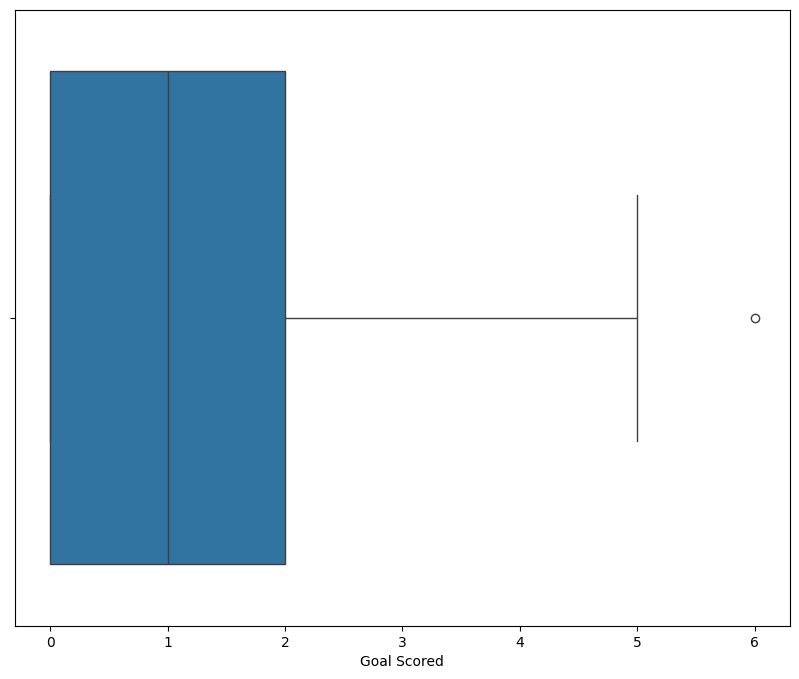

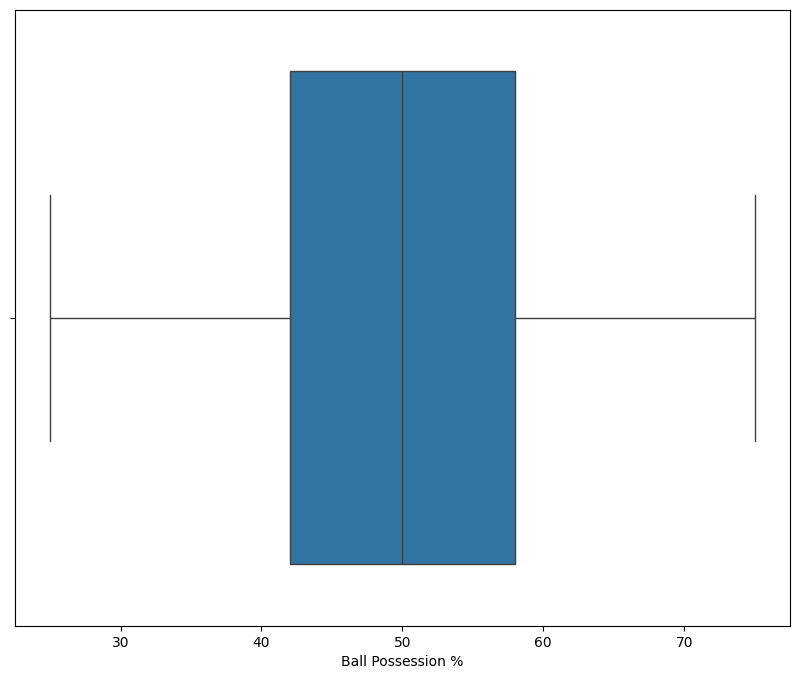

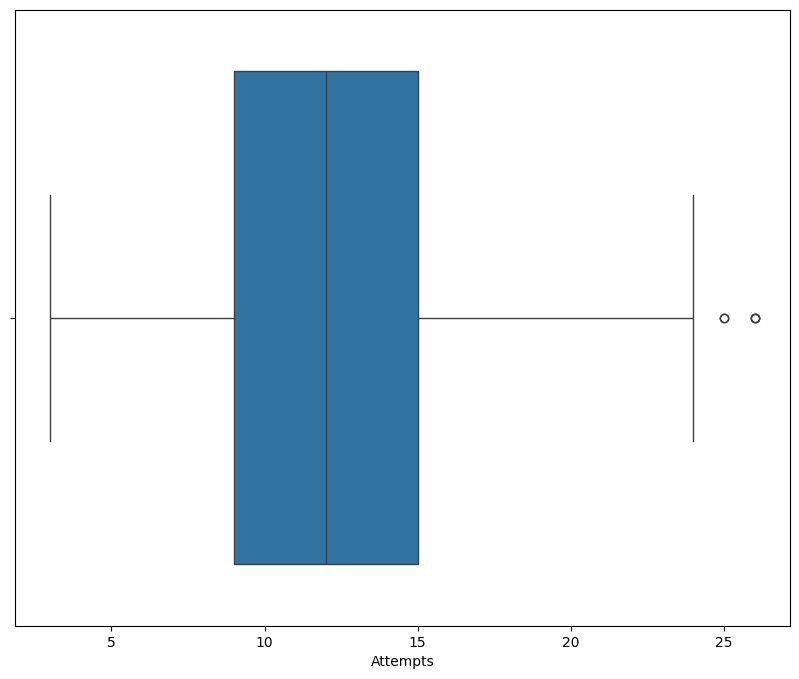

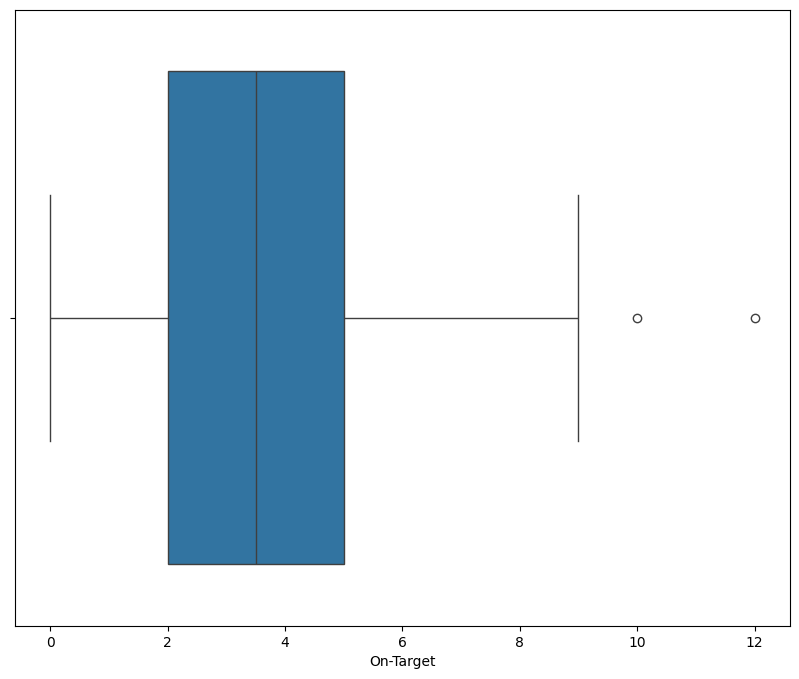

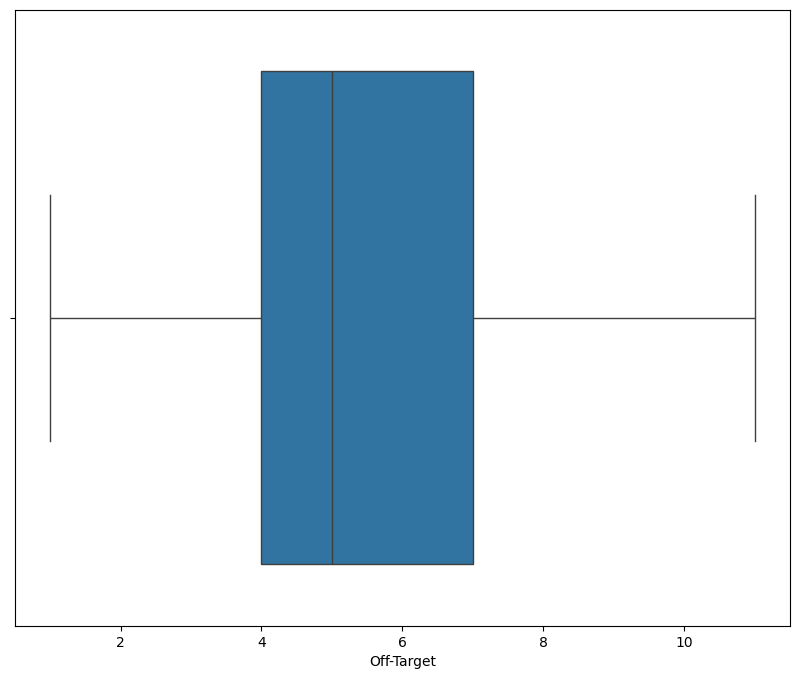

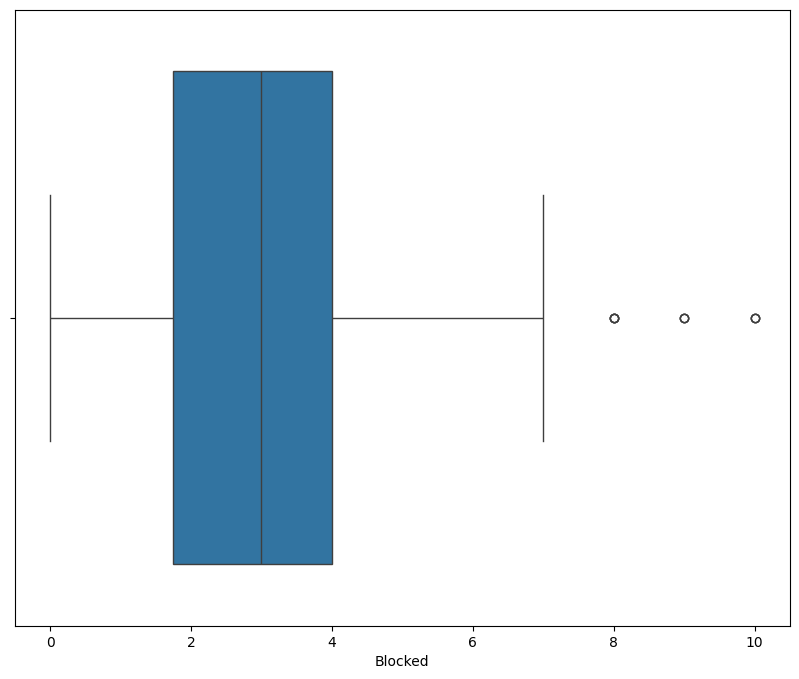

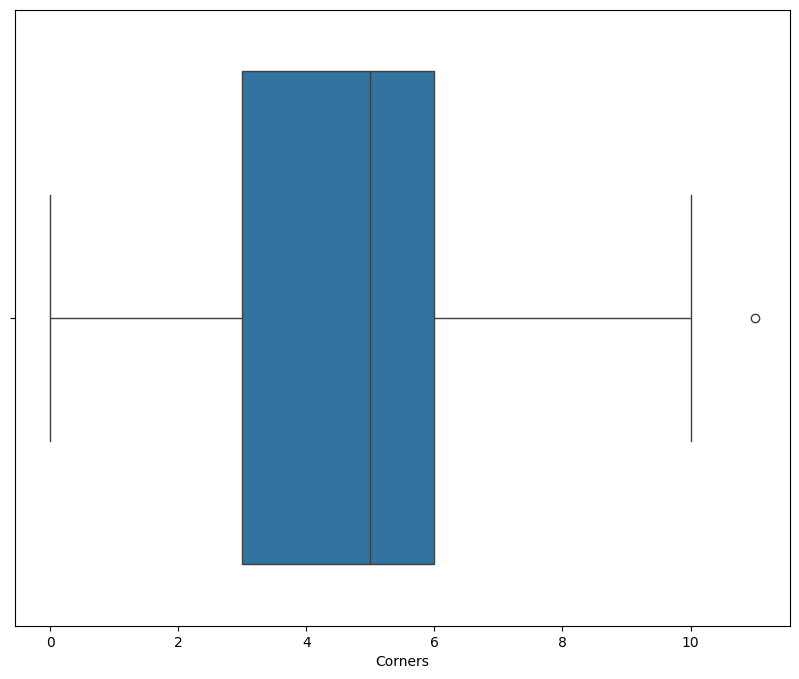

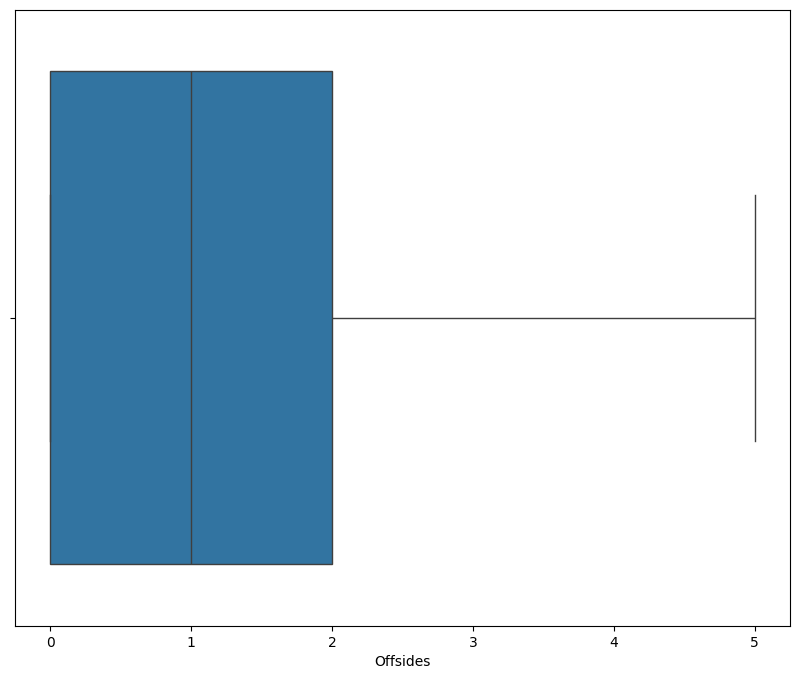

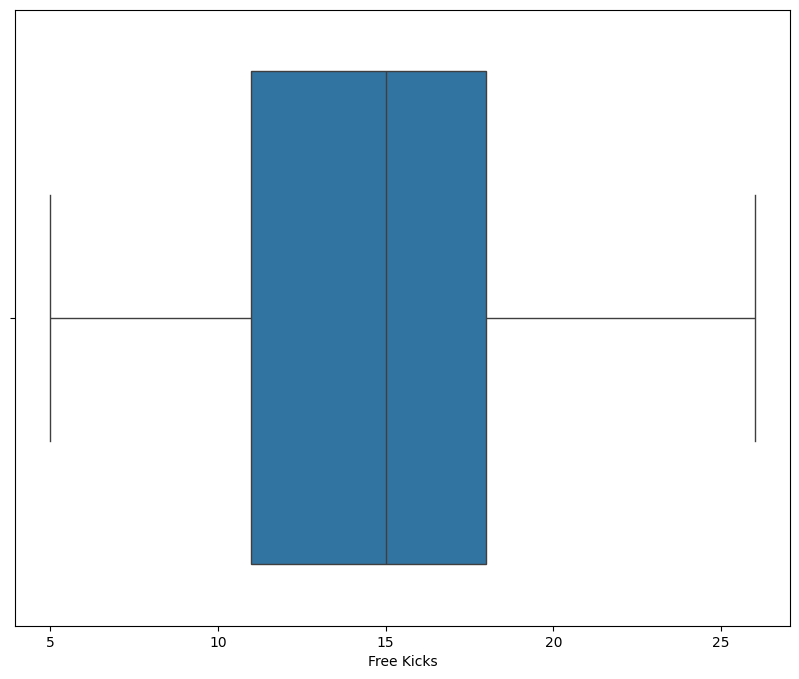

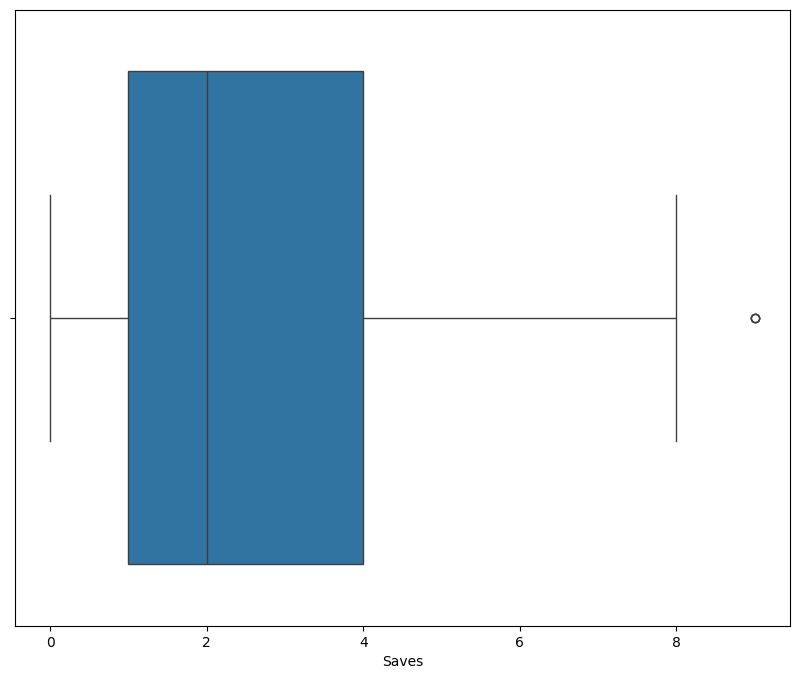

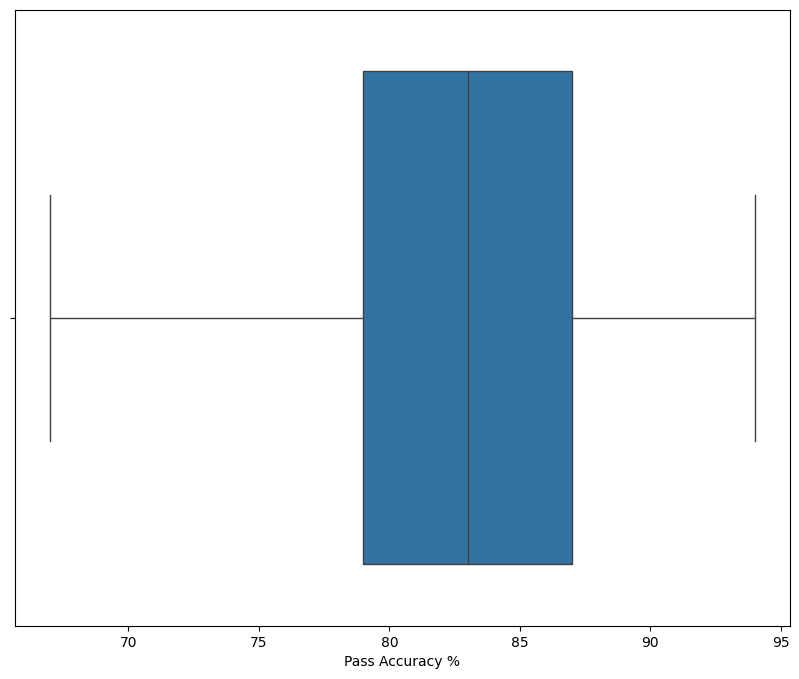

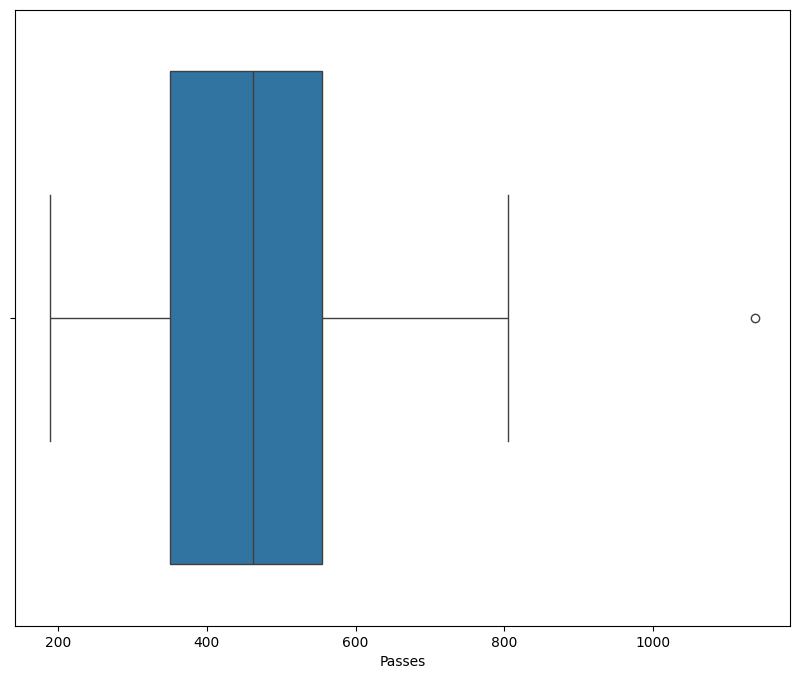

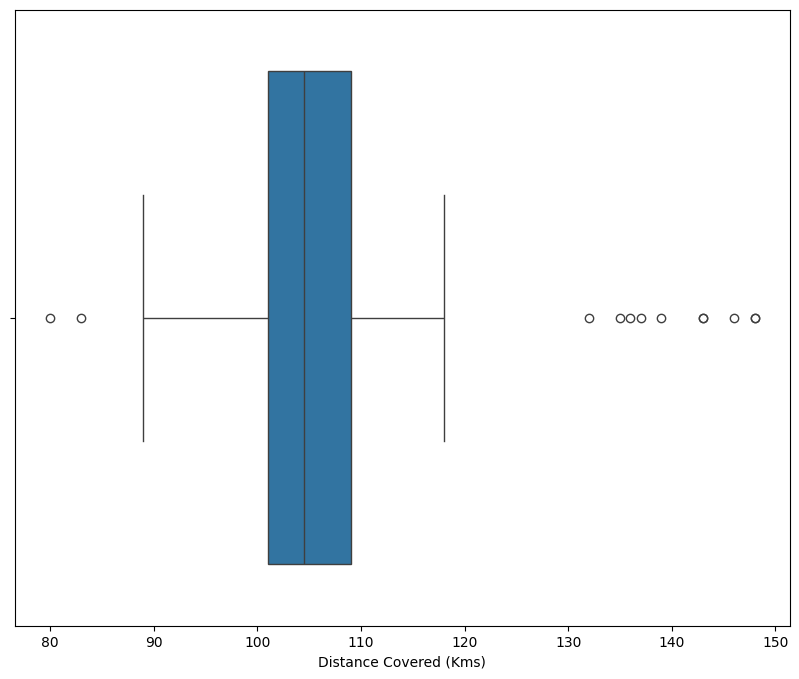

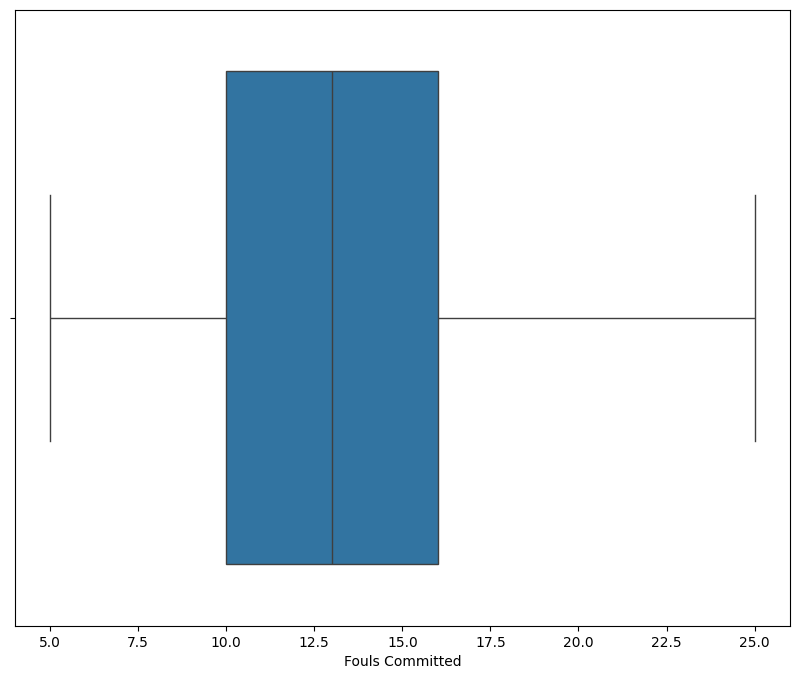

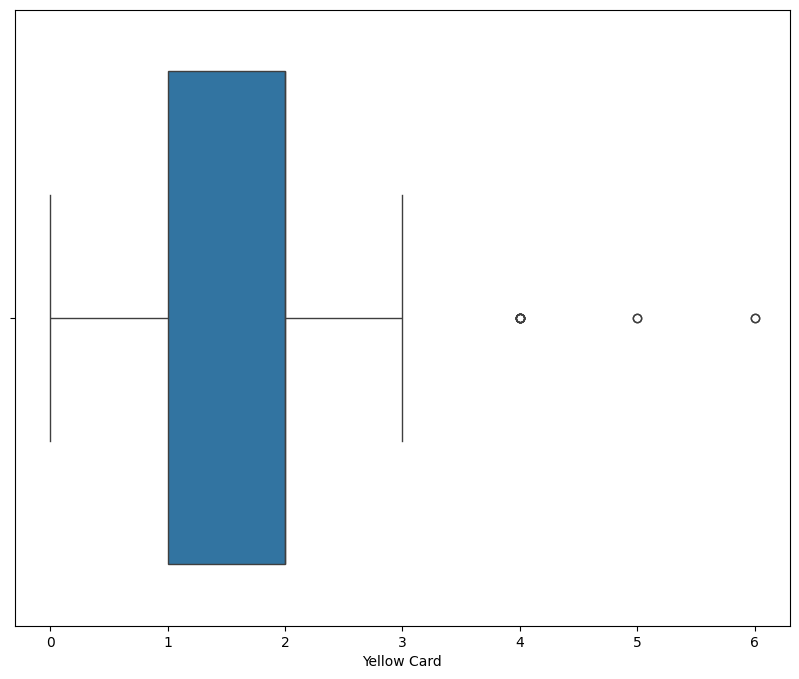

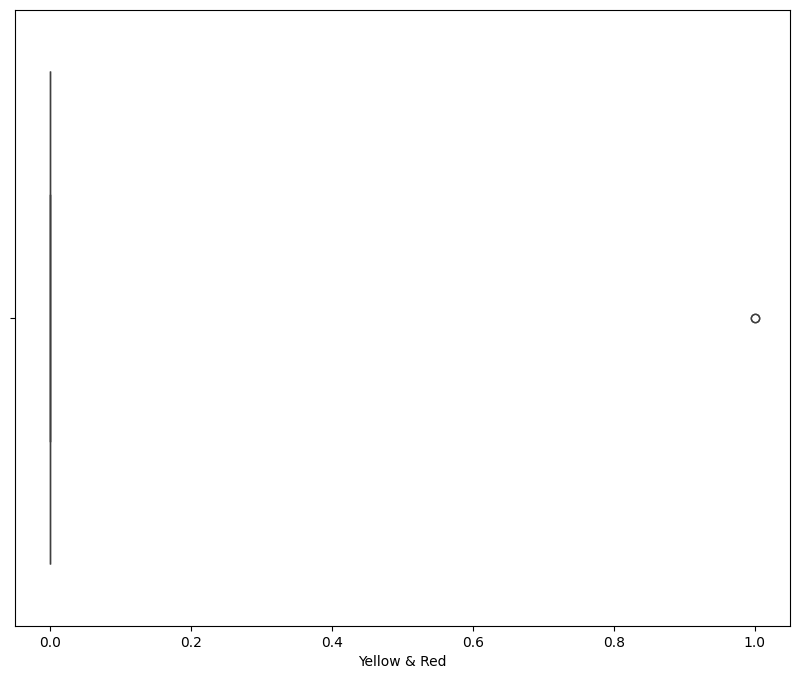

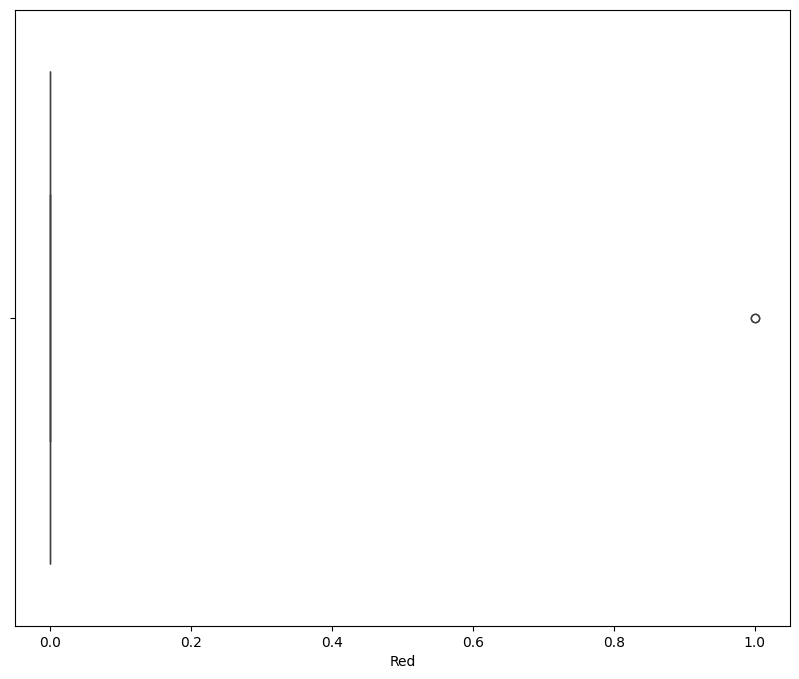

In [16]:
for column in data.select_dtypes(include=['float64','int64']).columns:
  plt.figure(figsize = (10,8))
  sns.boxplot(data[column], orient = 'h')
  plt.show

<Axes: xlabel='Goal Scored', ylabel='Count'>

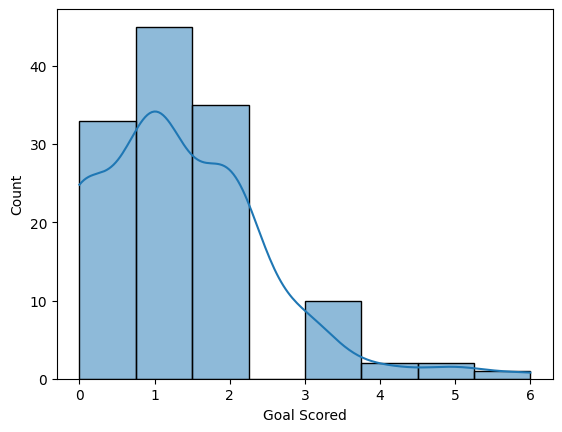

In [30]:
sns.histplot(data['Goal Scored'], kde = True)

In [18]:
data.drop(['Team','Opponent','Man of the Match'], axis = 1).corr()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red
Goal Scored,1.000000,0.034759,0.144915,0.461702,-0.020374,-0.087072,0.040446,0.045105,0.046815,-0.118893,0.135688,0.043971,0.014355,0.030331,-0.048838,-0.035031,-0.089714
Ball Possession %,0.034759,1.000000,0.541185,0.297234,0.361767,0.521510,0.542992,0.057706,0.273831,-0.293658,0.713872,0.880611,-0.059054,-0.296477,-0.205511,0.090924,0.024316
Attempts,0.144915,0.541185,1.000000,0.731243,0.718972,0.754307,0.686892,-0.016508,0.140850,-0.268217,0.397614,0.582831,0.171381,-0.248773,-0.185544,-0.074594,0.009795
On-Target,0.461702,0.297234,0.731243,1.000000,0.324672,0.331333,0.407576,0.073176,0.093090,-0.321557,0.291659,0.348099,0.065475,-0.192242,-0.115259,-0.051742,-0.023439
Off-Target,-0.020374,0.361767,0.718972,0.324672,1.000000,0.299712,0.440633,-0.095919,0.142367,-0.126644,0.189760,0.398949,0.229930,-0.186858,-0.124094,-0.145577,-0.119332
Blocked,-0.087072,0.521510,0.754307,0.331333,0.299712,1.000000,0.636172,-0.002231,0.086021,-0.142960,0.401699,0.532913,0.082111,-0.174606,-0.163111,0.033717,0.165295
Corners,0.040446,0.542992,0.686892,0.407576,0.440633,0.636172,1.000000,-0.034054,0.085216,-0.233787,0.330363,0.524661,0.099700,-0.165382,-0.169929,0.014543,0.117960
Offsides,0.045105,0.057706,-0.016508,0.073176,-0.095919,-0.002231,-0.034054,1.000000,0.089121,0.006539,0.127421,0.034715,0.031324,-0.040084,-0.047757,0.228531,-0.036432
Free Kicks,0.046815,0.273831,0.140850,0.093090,0.142367,0.086021,0.085216,0.089121,1.000000,-0.231637,0.131951,0.175695,0.076927,0.080341,-0.026741,0.029701,-0.104164
Saves,-0.118893,-0.293658,-0.268217,-0.321557,-0.126644,-0.142960,-0.233787,0.006539,-0.231637,1.000000,-0.190740,-0.264425,0.125645,0.074976,0.009670,0.140307,0.016875


In [29]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']):
  data[column] = encoder.fit_transform(data[column])

In [30]:
data.head()

,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match
0,24,25,5,11,10,7,2,3,6,3,5,0,8,15,26,17,0,0,0,1
1,25,24,0,31,3,0,2,3,2,1,19,2,16,68,15,5,0,0,0,0
2,9,32,0,14,5,3,2,2,0,1,2,3,8,40,22,7,2,0,0,0
3,32,9,1,28,11,4,5,4,5,1,7,3,16,86,21,1,0,0,0,1
4,18,14,0,35,10,3,5,4,5,0,8,2,16,49,11,17,1,0,0,0


In [32]:
X = data.drop(['Goal Scored'], axis=1)
Y = data['Goal Scored']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [33]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [37]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train_scaled, Y_train)

Y_pred = model.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score

mse_score = mean_squared_error(Y_test,Y_pred)

r2_score = r2_score(Y_test, Y_pred)

print('mse_score-------', mse_score)
print('r2_score-------', r2_score)

mse_score------- 1.0539062456235901
r2_score------- 0.09127471678374122


In [ ]:
# Score is not good, it requires further performance tuning